In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt


/Users/FrankWang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [6]:
from keras.callbacks import TensorBoard

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.3686 - val_loss: 0.3306
Epoch 2/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.3211 - val_loss: 0.3169
Epoch 3/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3116 - val_loss: 0.3103
Epoch 4/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.3062 - val_loss: 0.3056
Epoch 5/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3034 - val_loss: 0.3038


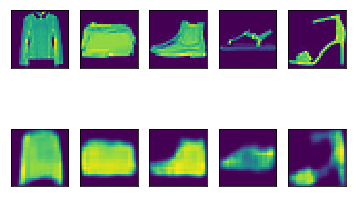

In [7]:
# Choose 5 random images in the testset and comapre them 
decoded_imgs = autoencoder.predict(x_test)
index = np.random.randint(10000, size=5)
f, axarr = plt.subplots(2, 5)
for i in range(5):
    axarr[0,i].imshow(x_test[index[i]].reshape(28, 28))
    axarr[0,i].get_xaxis().set_visible(False)
    axarr[0,i].get_yaxis().set_visible(False)
    axarr[1,i].imshow(decoded_imgs[index[i]].reshape(28, 28))
    axarr[1,i].get_xaxis().set_visible(False)
    axarr[1,i].get_yaxis().set_visible(False)


## 2.1 Deep CNN
Descroption of architectural choices: number of kernels: 32, kernel size: 3 by 3, strides: 2, padding: "same", which results in padding the input such that the output has the same length as the original input (reference: https://keras.io/layers/convolutional/), <br />
Network depth: two convolution layers $\rightarrow$ max pooling $\rightarrow$ 1 dense layer $\rightarrow$ final output layer. 

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) 

X_train shape: (60000, 28, 28, 1)


In [9]:
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [10]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten
import keras
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding="same",
                 activation='relu',
                 strides=(2, 2),
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [12]:
batch_size = 256
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 546us/step - loss: 0.7173 - acc: 0.7395 - val_loss: 0.5217 - val_acc: 0.7996
Epoch 2/10
60000/60000 [==============================] - 36s 604us/step - loss: 0.4383 - acc: 0.8423 - val_loss: 0.3798 - val_acc: 0.8637
Epoch 3/10
60000/60000 [==============================] - 34s 570us/step - loss: 0.3820 - acc: 0.8630 - val_loss: 0.4261 - val_acc: 0.8320
Epoch 4/10
60000/60000 [==============================] - 35s 578us/step - loss: 0.3481 - acc: 0.8724 - val_loss: 0.3393 - val_acc: 0.8745
Epoch 5/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.3228 - acc: 0.8831 - val_loss: 0.3159 - val_acc: 0.8818
Epoch 6/10
60000/60000 [==============================] - 34s 571us/step - loss: 0.3050 - acc: 0.8875 - val_loss: 0.2903 - val_acc: 0.8935
Epoch 7/10
60000/60000 [==============================] - 31s 519us/step - loss: 0.2900 - acc: 0.8944 - val_loss: 0.

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.2597639069914818
Test accuracy: 0.9047


In [14]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Training loss:', score[0]) 
print('Training accuracy:', score[1]) 

Training loss: 0.20878062274456025
Training accuracy: 0.9236


## 2.2 Transfer Learning

In [86]:
import cv2
from keras.applications import VGG16

# loading the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
# converting it to RGB
x_train = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_train]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')

x_test = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_test]
x_test = np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')
conv_base = VGG16(weights='imagenet', include_top=False,input_shape = (32,32,3))
for layer in conv_base.layers:
    layer.trainable = False

    
model = Sequential()
model.add(conv_base)
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))

#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


batch_size = 256
num_epoch = 5
#model training
model_log = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 645s 11ms/step - loss: 1.6333 - acc: 0.5282 - val_loss: 0.7129 - val_acc: 0.7374
Epoch 2/5
60000/60000 [==============================] - 625s 10ms/step - loss: 0.9687 - acc: 0.6558 - val_loss: 0.6394 - val_acc: 0.7594
Epoch 3/5
60000/60000 [==============================] - 706s 12ms/step - loss: 0.8596 - acc: 0.6919 - val_loss: 0.6178 - val_acc: 0.7829
Epoch 4/5
60000/60000 [==============================] - 723s 12ms/step - loss: 0.8071 - acc: 0.7097 - val_loss: 0.5891 - val_acc: 0.7921
Epoch 5/5
60000/60000 [==============================] - 647s 11ms/step - loss: 0.7478 - acc: 0.7290 - val_loss: 0.5621 - val_acc: 0.7975


In [87]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.5620787094116211
Test accuracy: 0.7975


In [88]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Training loss:', score[0]) 
print('Training accuracy:', score[1]) 

Training loss: 0.5212618622144063
Training accuracy: 0.8122833333333334


# 3 Text Classification
## 3.1 RNN

In [1]:
from keras.utils.data_utils import get_file
import io
from keras.preprocessing.text import one_hot
from keras.preprocessing import sequence
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Convolution1D
from keras.optimizers import SGD
from keras.layers.embeddings import Embedding
import seaborn as sns
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop
import numpy as np


benign = get_file('benign',
    origin='https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt')

with io.open(benign, encoding='utf-8') as f:
    lines = f.readlines()
benign_srt = []
for i in lines:
    if i[0]!='#':
        i = i.rstrip("\n\r")
        benign_srt.append(i.lower()) 

len(benign_srt)

malicious = get_file('malicious',
    origin='https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt')

with io.open(malicious, encoding='utf-8') as f:
    lines = f.readlines()
malicious_srt = []
for i in lines:
    if i[0]!='#':
        i = i.rstrip("\n\r")
        malicious_srt.append(i.lower()) 
        
len(malicious_srt)


tot_str = benign_srt+malicious_srt

my_lst_str = ''.join(map(str, tot_str))


chars = sorted(list(set(my_lst_str)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
max_len = max([len(i) for i in tot_str])


X = np.zeros((len(tot_str), max_len, len(chars)), dtype=np.uint8 )
Y = np.concatenate([np.zeros(len(benign_srt)), np.ones(len(malicious_srt)) ])
for i, seq in enumerate(tot_str):
    for t, char in enumerate(seq):
        X[i, t, char_indices[char]] = 1

# Test train split
rand_index = random.sample(range(len(Y)), len(Y))
X_shuffle = X[rand_index]
Y_shuffle = Y[rand_index]
split_index = int(len(Y)*0.7)
X_train = X_shuffle[:split_index,:].astype(int)
Y_train = Y_shuffle[:split_index,].astype(int)
X_test = X_shuffle[split_index:,:].astype(int)
Y_test = Y_shuffle[split_index:,].astype(int)

model1 = Sequential()
model1.add(LSTM(128, input_shape=(max_len, len(chars))))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_log = model1.fit(X_train, Y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(X_test, Y_test))


/Users/FrankWang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


total chars: 41
Train on 47117 samples, validate on 20194 samples
Epoch 1/5
47117/47117 [==============================] - 85s 2ms/step - loss: 0.1127 - acc: 0.9798 - val_loss: 0.0930 - val_acc: 0.9813
Epoch 2/5
47117/47117 [==============================] - 71s 2ms/step - loss: 0.0965 - acc: 0.9805 - val_loss: 0.0930 - val_acc: 0.9813
Epoch 3/5
47117/47117 [==============================] - 78s 2ms/step - loss: 0.0964 - acc: 0.9805 - val_loss: 0.0929 - val_acc: 0.9813
Epoch 4/5
47117/47117 [==============================] - 77s 2ms/step - loss: 0.0964 - acc: 0.9805 - val_loss: 0.0937 - val_acc: 0.9813
Epoch 5/5
47117/47117 [==============================] - 84s 2ms/step - loss: 0.0964 - acc: 0.9805 - val_loss: 0.0932 - val_acc: 0.9813


In [2]:
score = model1.evaluate(X_train, Y_train, verbose=0)
print('Training loss:', score[0]) 
print('Training accuracy:', score[1]) 

Training loss: 0.09636589673180924
Training accuracy: 0.980495362609241


In [3]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.09322626913545438
Test accuracy: 0.9813310884421115


# 3.2 CNN

In [4]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling2D,Flatten

model2 = Sequential()
model2.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model2.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=4))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_log = model2.fit(X_train, Y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(X_test, Y_test))


Train on 47117 samples, validate on 20194 samples
Epoch 1/5
47117/47117 [==============================] - 53s 1ms/step - loss: 0.0503 - acc: 0.9797 - val_loss: 0.0211 - val_acc: 0.9898
Epoch 2/5
47117/47117 [==============================] - 44s 931us/step - loss: 0.0203 - acc: 0.9906 - val_loss: 0.0166 - val_acc: 0.9913
Epoch 3/5
47117/47117 [==============================] - 45s 946us/step - loss: 0.0160 - acc: 0.9928 - val_loss: 0.0159 - val_acc: 0.9926
Epoch 4/5
47117/47117 [==============================] - 48s 1ms/step - loss: 0.0128 - acc: 0.9943 - val_loss: 0.0164 - val_acc: 0.9922
Epoch 5/5
47117/47117 [==============================] - 44s 938us/step - loss: 0.0093 - acc: 0.9963 - val_loss: 0.0177 - val_acc: 0.9924


In [5]:
score = model2.evaluate(X_train, Y_train, verbose=0)
print('Training loss:', score[0]) 
print('Training accuracy:', score[1]) 

Training loss: 0.00689394324911594
Training accuracy: 0.9973682534966148


In [6]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.0176778316822066
Test accuracy: 0.9924234921263742


## 3.3 Compare Two methods

In [7]:
from sklearn.metrics import roc_curve
y_pred_rnn = model1.predict(X_test).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(Y_test, y_pred_rnn)

y_pred_cnn = model2.predict(X_test).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(Y_test, y_pred_cnn)

In [8]:
from sklearn.metrics import auc
auc_rnn = auc(fpr_rnn, tpr_rnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)


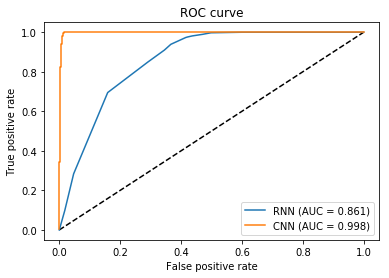

In [10]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (AUC = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (AUC = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
